# Simulation of Clustered-Input on Dendritic Segments 

In [2]:
from scipy import stats

from cell_template import Cell, BRANCH_COLORS
from clustered_input_stim import *
from parallel import Parallel

import sys
sys.path.append('..')
import plot_tools as pt
import matplotlib.pylab as plt

# Visualizing the Distant-Dependent Clusters

In [92]:
distance_intervals  = [[20,60], 
                       [160,200]]

def show_cluster(cell, iDistance, label, sparsening=5.):
    
    props ={'iDistance':iDistance, # 2 -> means "distal" range
            'distance_intervals':distance_intervals,
            'sparsening':sparsening}

    fig, AX = pt.figure(figsize=(1.7,2.5), axes=(2, 6), hspace=0.2, wspace=0., left=0.3)
    
    for iBranch in range(6):
        c, INSETS = BRANCH_COLORS[iBranch], []
        pt.annotate(AX[iBranch][0], 'branch #%i' % (1+iBranch), (-1, 0.5), color=c)
        _, inset = find_clustered_input(cell, iBranch, **props,
                            with_plot=True, ax=AX[iBranch][0], syn_color=c)
        INSETS.append(inset)
        _, inset = find_clustered_input(cell, iBranch, from_uniform=True, **props,
                            with_plot=True, syn_color=c, ax=AX[iBranch][1])
        INSETS.append(inset)
        pt.annotate(AX[iBranch][0], 'real', (-0.3,0.3), bold=True, color=c)
        pt.annotate(AX[iBranch][1], 'uniform', (-0.3,0.3), bold=True, color=c)

        pt.set_common_ylims(INSETS)
    fig.suptitle('**%s cluster**,  interval: %s um' % (label, str(distance_intervals[iDistance])))
    return fig

### Basket Cell

In [3]:
# load cell:            (need to Restart the Kernel when changing cell !)
ID = '864691135396580129_296758' # Basket Cell example
cell = Cell(ID=ID, params_key='BC')

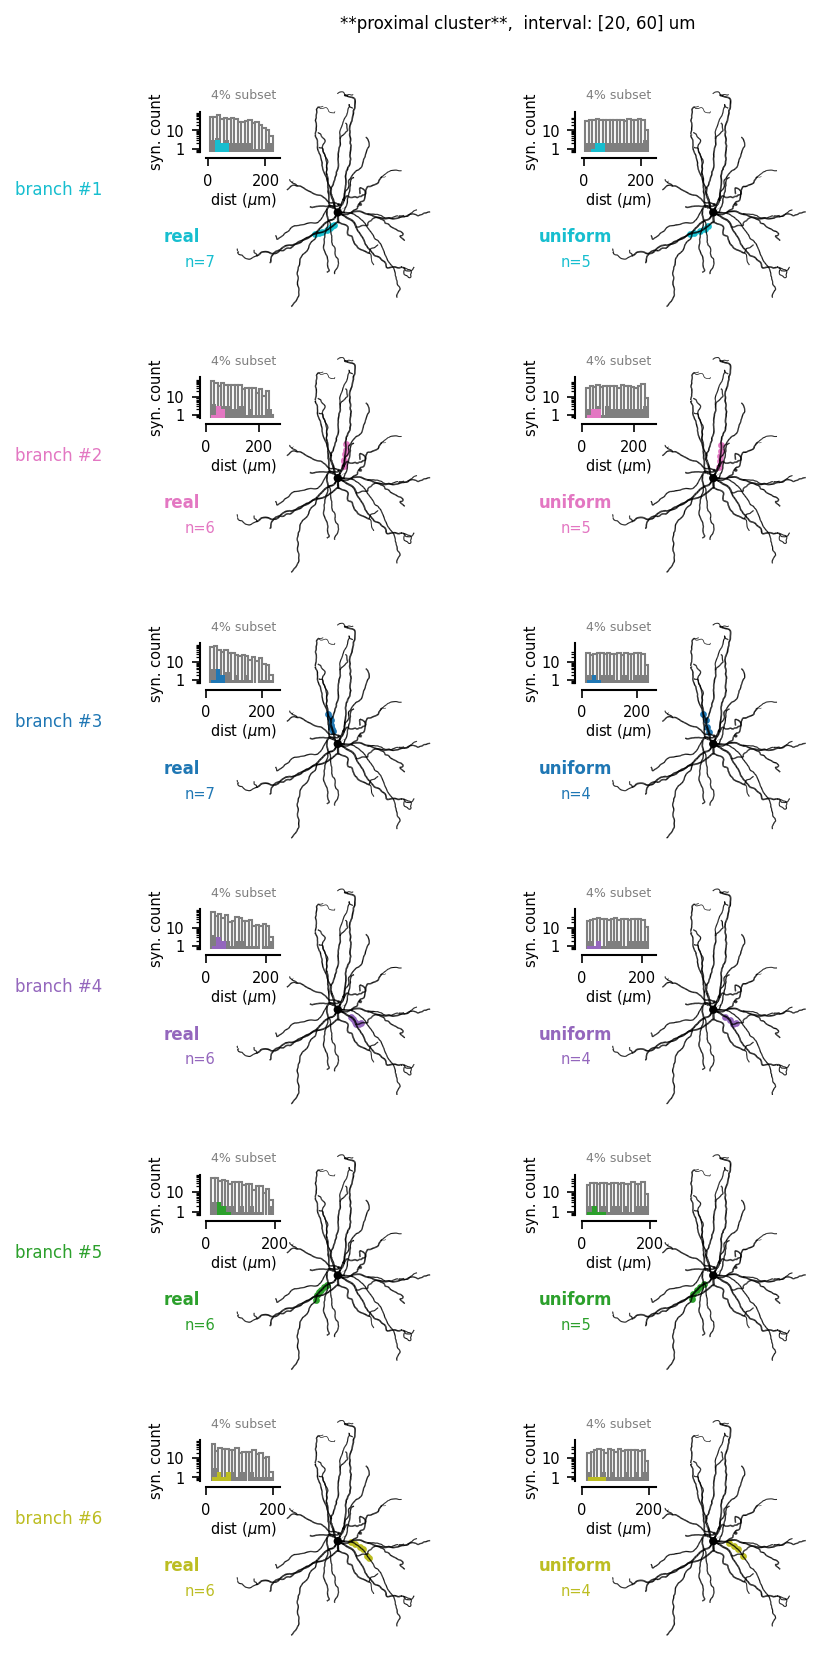

In [4]:
fig = show_cluster(cell, 0, 'proximal', sparsening=4.)
fig.savefig('../figures/Figure4/cluster-proximal-BC.pdf')

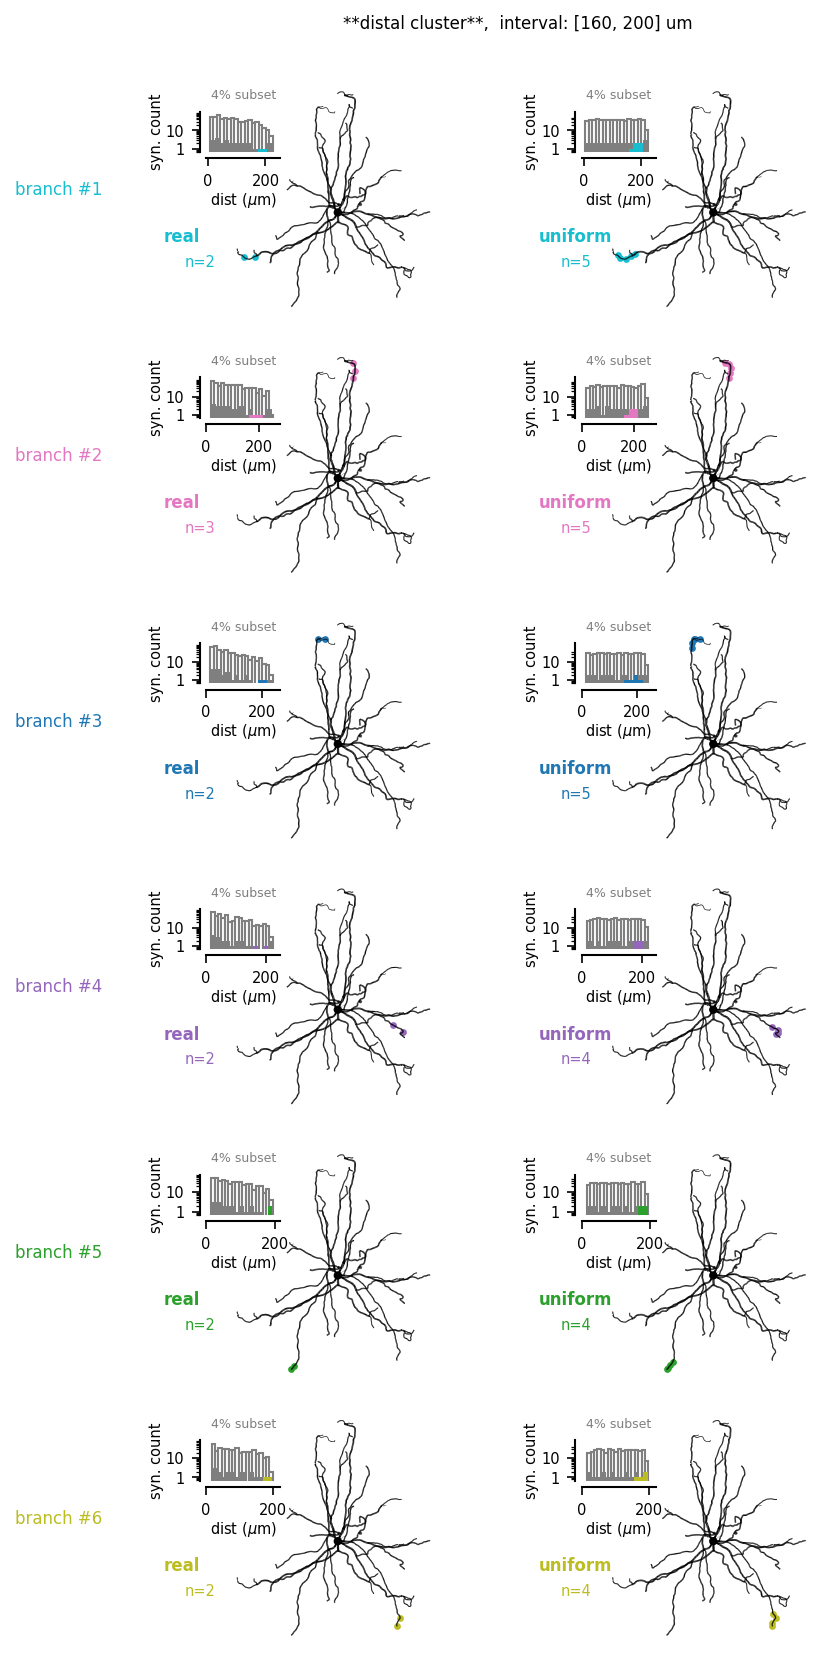

In [5]:
fig = show_cluster(cell, 1, 'distal', sparsening=4.)
fig.savefig('../figures/Figure4/cluster-distal-BC.pdf')

### Martinotti Cell

In [6]:
# load cell:            (need to Restart the Kernel when changing cell !)
ID = '864691135571546917_264824' # Martinotti Cell example
cell = Cell(ID=ID, params_key='MC')

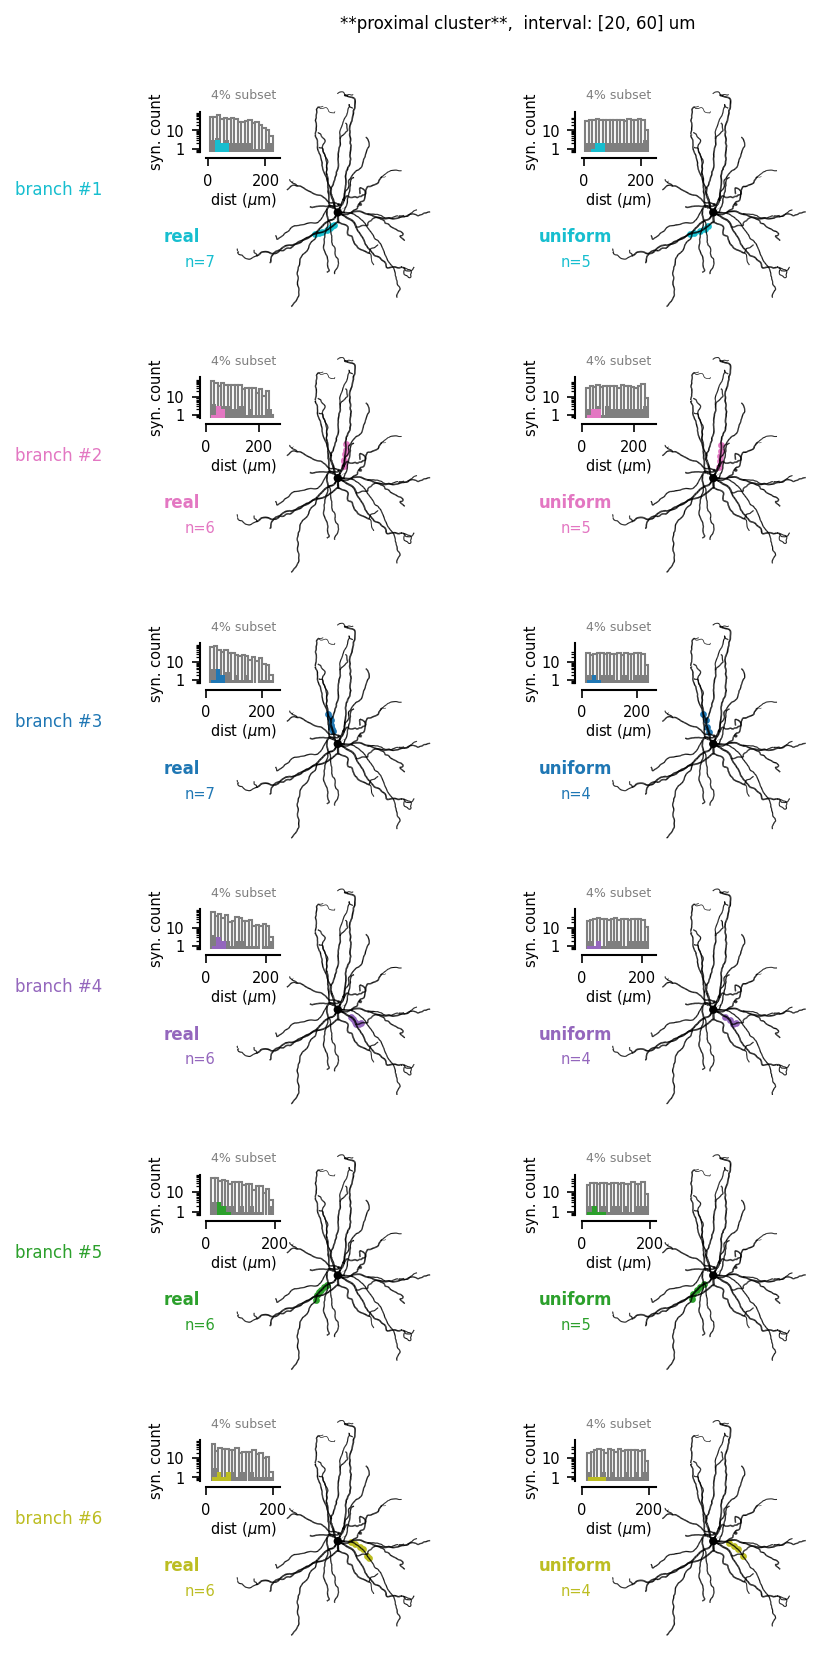

In [6]:
fig = show_cluster(cell, 0, 'proximal', sparsening=4.)
fig.savefig('../figures/Figure4/cluster-proximal-MC.pdf')

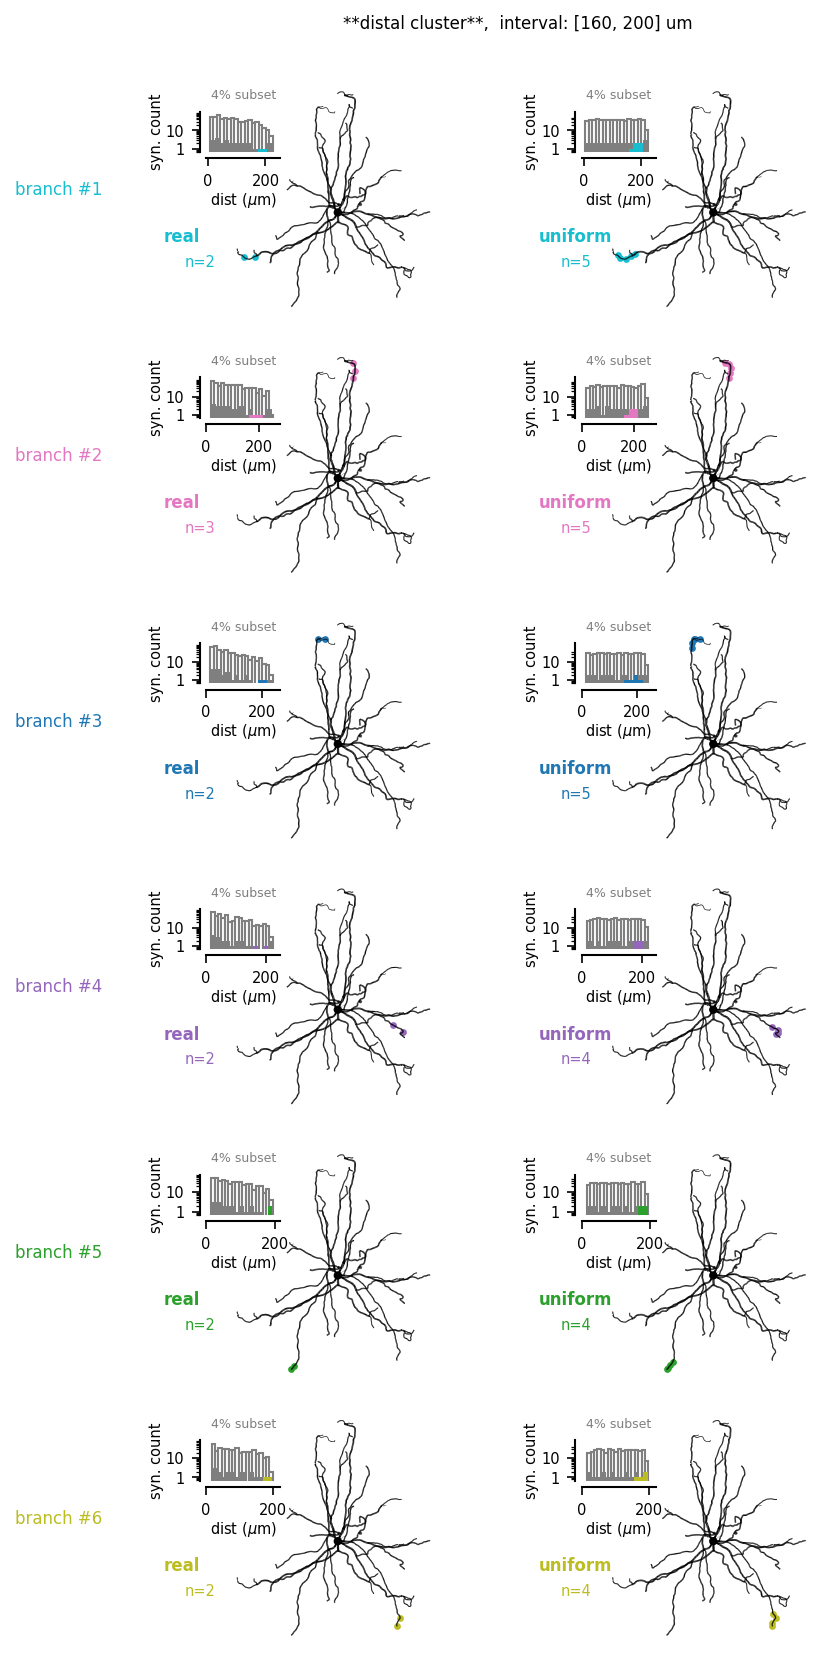

In [7]:
fig = show_cluster(cell, 1, 'distal', sparsening=4.)
fig.savefig('../figures/Figure4/cluster-distal-MC.pdf')

# Simulations of Segment-specific Multi-input Integration

N.B. **passive only** simulation settings

### Example Simulation

```
python clustered_input_stim.py --test
```

#### Visualize Example Simulation

Made of single synapse stimulation events + a stimulation pattern all together

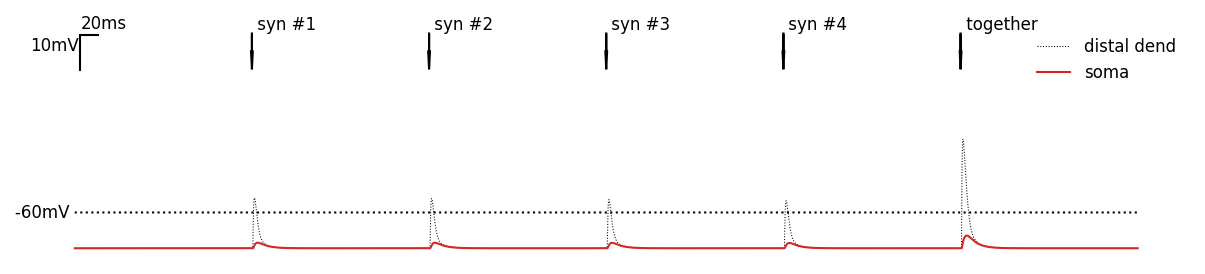

In [69]:
import numpy as np
results = np.load('single_sim.npy', allow_pickle=True).item()

t = np.arange(len(results['Vm_soma']))*results['dt']
fig, ax = pt.figure(figsize=(3,2.5), left=0, bottom=0.)

for i, syn in enumerate(results['synapses']):
    pt.arrow(ax, [results['t0']+i*results['ISI'], -10, 0, -10],
             head_width=2, head_length=5, width=0.1)
    pt.annotate(ax, ' syn #%i' % (i+1), (results['t0']+i*results['ISI'], -10), xycoords='data')
pt.arrow(ax, [results['t0']+(i+1)*results['ISI'], -10, 0, -10],
         head_width=2, head_length=5, width=0.1)
pt.annotate(ax, ' together', (results['t0']+(i+1)*results['ISI'], -10), xycoords='data')

ax.plot(t, results['Vm_dend'], 'k:', lw=0.5, label='distal dend')
ax.plot(t, results['Vm_soma'], 'tab:red', label='soma')
ax.plot(t, -60+0*t, 'k:')
pt.annotate(ax, '-60mV ', (0,-60), xycoords='data', ha='right', va='center')

ax.axis('off')
pt.draw_bar_scales(ax, Xbar=20, Xbar_label='20ms', Ybar=10, Ybar_label='10mV')
ax.legend(frameon=False, loc='best')

#### Compare Real Response to Linear Prediction from Arithmetic Sum of Individual Responses

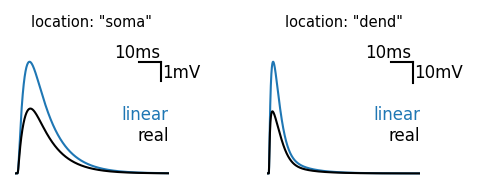

In [70]:
t = np.arange(len(results['linear_soma']))*results['dt']
fig, AX = pt.figure(axes=(2,1), figsize=(1.1,1.3), left=0, bottom=0.)

for ax, loc, ys in zip(AX, ['soma', 'dend'], [1, 10]):
    for r, resp, c in zip(range(2), ['linear', 'real'], ['tab:blue', 'k']):
        ax.plot(t, results['%s_%s' % (resp, loc)], color=c)
        pt.annotate(ax, r*'\n'+resp, (1., 0.6), ha='right', va='top', color=c)
    ax.axis('off')
    ax.set_xlim([0, 70])
    pt.draw_bar_scales(ax, Xbar=10, Xbar_label='10ms', 
                       Ybar=ys, Ybar_label='%imV'%ys, loc='top-right')
    ax.set_title('location: "%s"\n' % loc, fontsize=7)

## Basket Cell -- Perform Full Simulation Data

Execute the following command:
```
python clustered_input_stim.py -c Basket --test_uniform --sparsening 5 6 7 8 9 10
```


### Loading Simulated Data

In [81]:
sim = Parallel(\
        filename='../data/detailed_model/clusterStim_sim_Basket.zip')
sim.load()

### Plot

NameError: name 'BRANCH_COLORS' is not defined

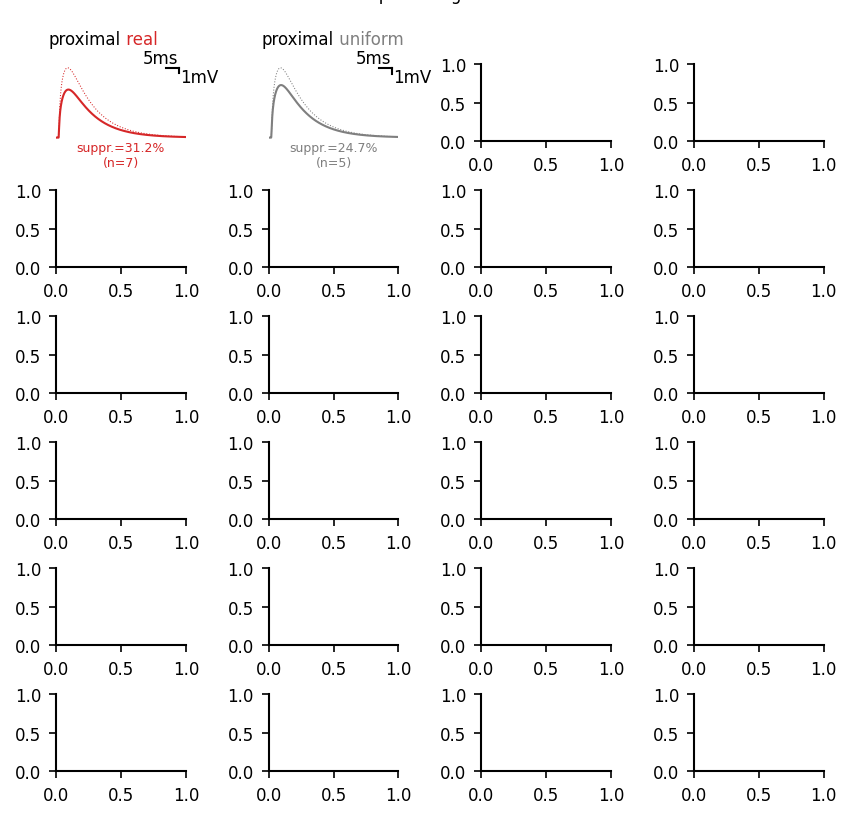

In [82]:
import numpy as np

loc, based_on = 'soma', 'peak'
sparsening = 4.0

sim.fetch_quantity_on_grid('linear_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('real_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('%s_efficacy_%s' % (based_on, loc), dtype=float)
sim.fetch_quantity_on_grid('synapses', dtype=list)
dt = sim.fetch_quantity_on_grid('dt', return_last=True)

fig, AX = pt.figure(axes=(2*len(np.unique(sim.iDistance)),
                          len(np.unique(sim.iBranch))))
plt.subplots_adjust(top=.8)
pt.annotate(fig, 'sparsening: X%%\n\n', (0.5, .79), ha='center', xycoords='figure fraction')

CONDS = ['proximal', 'distal']
COLORS, LABELS = ['tab:red', 'tab:grey'], [' real', ' uniform']
    
for iDistance in np.unique(sim.iDistance):
    for iBranch in np.unique(sim.iBranch):
        params = {'iDistance':iDistance, 'iBranch':iBranch, 'sparsening':sparsening}
        for f, fU in enumerate([False, True]):
            real = sim.get('real_%s' % loc, dict(from_uniform=fU, **params))[0]
            linear = sim.get('linear_%s' % loc, dict(from_uniform=fU, **params))[0]
            t = np.arange(len(real))*dt
            AX[iBranch][2*iDistance+f].plot(t, real, '-', color=COLORS[f])
            AX[iBranch][2*iDistance+f].plot(t, linear, ':', color=COLORS[f], lw=0.5)
            n = len(sim.get('synapses', dict(from_uniform=fU, **params))[0])
            pt.annotate(AX[iBranch][2*iDistance+f], 
                        'suppr.=%.1f%%\n(n=%i)' % (100.-sim.get('%s_efficacy_%s' % (based_on, loc),
                                                      dict(from_uniform=fU, **params))[0], n),
                        (0.5,0), va='top', ha='center', color=COLORS[f], fontsize=6)
            
            pt.set_plot(AX[iBranch][2*iDistance+f], [], xlim=[0,50])
            pt.draw_bar_scales(AX[iBranch][2*iDistance+f], loc='top-right',
                               Xbar=5, Xbar_label='5ms',
                               Ybar=1 if loc=='soma' else 10,
                               Ybar_label='1mV' if loc=='soma' else '10mV')
            if iBranch==0:
                pt.annotate(AX[0][2*iDistance+f], CONDS[iDistance], (0.5,1.2), ha='right')
                pt.annotate(AX[0][2*iDistance+f], LABELS[f], (0.5,1.2), color=COLORS[f])
    
        if iDistance==0:
            pt.annotate(AX[iBranch][iDistance], 'branch #%i' % (iBranch+1),
                        (-1.3,0.3), color=BRANCH_COLORS[iBranch])
    
fig.savefig('../figures/Figure4/cluster-single-traces-BC.pdf')

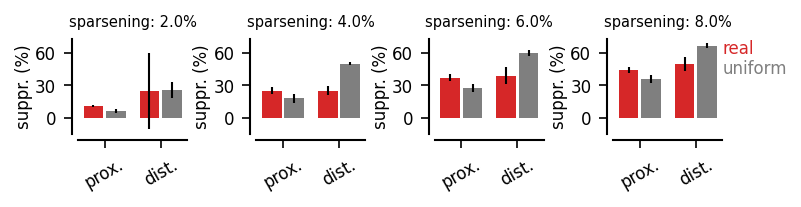

In [88]:
# plot across different sparsening levels

based_on = 'peak_efficacy_soma' # summary quantity to plot

sim.fetch_quantity_on_grid(based_on, dtype=float)

COLORS, LABELS = ['tab:red', 'tab:grey'], ['real', 'uniform']

fig, AX = pt.figure(axes=(len(np.unique(sim.sparsening)),1),
                    figsize=(.9, 1), reshape_axes=False)

for i, frac in enumerate(np.unique(sim.sparsening)):
    AX[0][i].set_title('sparsening: %.1f%%' % frac, fontsize=7)
    for f, fU in enumerate([False, True]):
        for iDistance in np.unique(sim.iDistance):
            params = dict(iDistance=iDistance, from_uniform=fU, sparsening=frac)
            AX[0][i].bar([iDistance+0.4*f], [100-np.mean(sim.get(based_on, params))],
                   yerr=[np.nanstd(sim.get(based_on, params))], color=COLORS[f], width=0.35)
        if i==0:
            pt.annotate(AX[0][-1], f*'\n'+LABELS[f], (1,1), va='top', color=COLORS[f])
    pt.set_plot(AX[0][i], ylabel='suppr. (%)',# ylabel='efficacy (%)',
                xticks=0.2+np.arange(2), xticks_labels=['prox.', 'dist.'],
                xticks_rotation=30)

pt.set_common_ylims(AX)

fig.savefig('../figures/FigS9/cluster-suppression-varying-sparsening-BC.pdf')

## Suppression Effect


 statistics on the distal/prox ratios:

 mean +/- s.e.m.: 1.03 +/- 0.12
 mean +/- s.e.m.: 2.95 +/- 0.33
- Wilcoxon:        WilcoxonResult(statistic=0.0, pvalue=0.03125)
- Paired t-test:   TtestResult(statistic=-5.846908877225378, pvalue=0.002071865565901593, df=5)


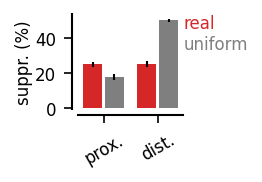

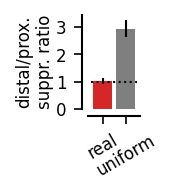

In [89]:
sparsening = 4.0

fig1, ax1 = pt.figure(figsize=(.9, 1))
fig2, ax2 = pt.figure(figsize=(.63, 1))

Xs = []
for f, fU in enumerate([False, True]):
    # suppression
    for iDistance in np.unique(sim.iDistance):
        params = dict(iDistance=iDistance, from_uniform=fU, sparsening=sparsening)
        ax1.bar([iDistance+0.4*f], [100-np.mean(sim.get(based_on, params))],
               yerr=[stats.sem(sim.get(based_on, params))], color=COLORS[f], width=0.35)
    # suppression ratios
    pProx = dict(iDistance=0, from_uniform=fU, sparsening=sparsening)
    pDist = dict(iDistance=1, from_uniform=fU, sparsening=sparsening)
    X = (100-sim.get(based_on, pDist))/(100-sim.get(based_on, pProx))
    ax2.bar([f], [np.mean(X)], yerr=[stats.sem(X)], color=COLORS[f])#, width=0.5)
    pt.annotate(ax1, f*'\n'+LABELS[f], (1,1), va='top', color=COLORS[f])
    Xs.append(X)
    
print('\n statistics on the distal/prox ratios:\n')
for X in Xs:
    print(' mean +/- s.e.m.: %.2f +/- %.2f' % (np.mean(X), stats.sem(X)))
print('- Wilcoxon:       ', stats.wilcoxon(*Xs))
print('- Paired t-test:  ', stats.ttest_rel(*Xs))

pt.set_plot(ax1, ylabel='suppr. (%)',
            xticks=0.2+np.arange(2), xticks_labels=['prox.', 'dist.'],
            xticks_rotation=30)

ax2.plot([-0.5,1.5], [1,1], 'k:')
pt.set_plot(ax2, ylabel='distal/prox.\nsuppr. ratio',
            xticks=np.arange(2), xticks_labels=['real', 'uniform'],
            yticks=[0,1,2,3],  
            #ylim=[0,4],
            xticks_rotation=30)

fig1.savefig('../figures/Figure4/cluster-suppression-prox-dist-BC.pdf')
fig2.savefig('../figures/Figure4/cluster-suppression-ratio-BC.pdf')

## Martinotti Cell -- Perform Full Simulation Data

Execute the following command:
```
python clustered_input_stim.py -c Martinotti --test_NMDA --sparsening 5 6 7 8 9 10
```


### Load

In [22]:
from parallel import Parallel

sim = Parallel(\
        filename='../data/detailed_model/clusterStim_sim_Martinotti.zip')

sim.load()

### Plot

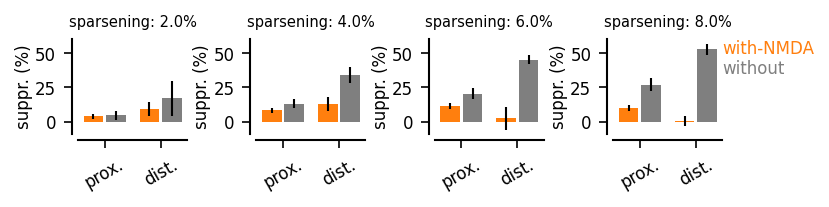

In [23]:
# plot across different sparsening levels
import numpy as np

based_on = 'peak_efficacy_soma' # summary quantity to plot

sim.fetch_quantity_on_grid(based_on, dtype=float)

COLORS, LABELS = ['tab:orange', 'tab:grey'], ['with-NMDA', 'without']

fig, AX = pt.figure(axes=(len(np.unique(sim.synSubsamplingFraction)),1),
                    figsize=(.9, 1), reshape_axes=False)

for i, frac in enumerate(np.unique(sim.synSubsamplingFraction)):
    AX[0][i].set_title('sparsening: %.1f%%' % (100*frac), fontsize=7)
    for f, wN in enumerate([True, False]):
        for iDistance in np.unique(sim.iDistance):
            params = dict(iDistance=iDistance, with_NMDA=wN, synSubsamplingFraction=frac)
            AX[0][i].bar([iDistance+0.4*f], [100-np.mean(sim.get(based_on, params))],
                   yerr=[np.nanstd(sim.get(based_on, params))], color=COLORS[f], width=0.35)
        if i==0:
            pt.annotate(AX[0][-1], f*'\n'+LABELS[f], (1,1), va='top', color=COLORS[f])
    pt.set_plot(AX[0][i], ylabel='suppr. (%)',# ylabel='efficacy (%)',
                xticks=0.2+np.arange(2), xticks_labels=['prox.', 'dist.'],
                xticks_rotation=30)
    
pt.set_common_ylims(AX)

fig.savefig('../figures/FigS9/cluster-suppression-varying-sparsening-MC.pdf')

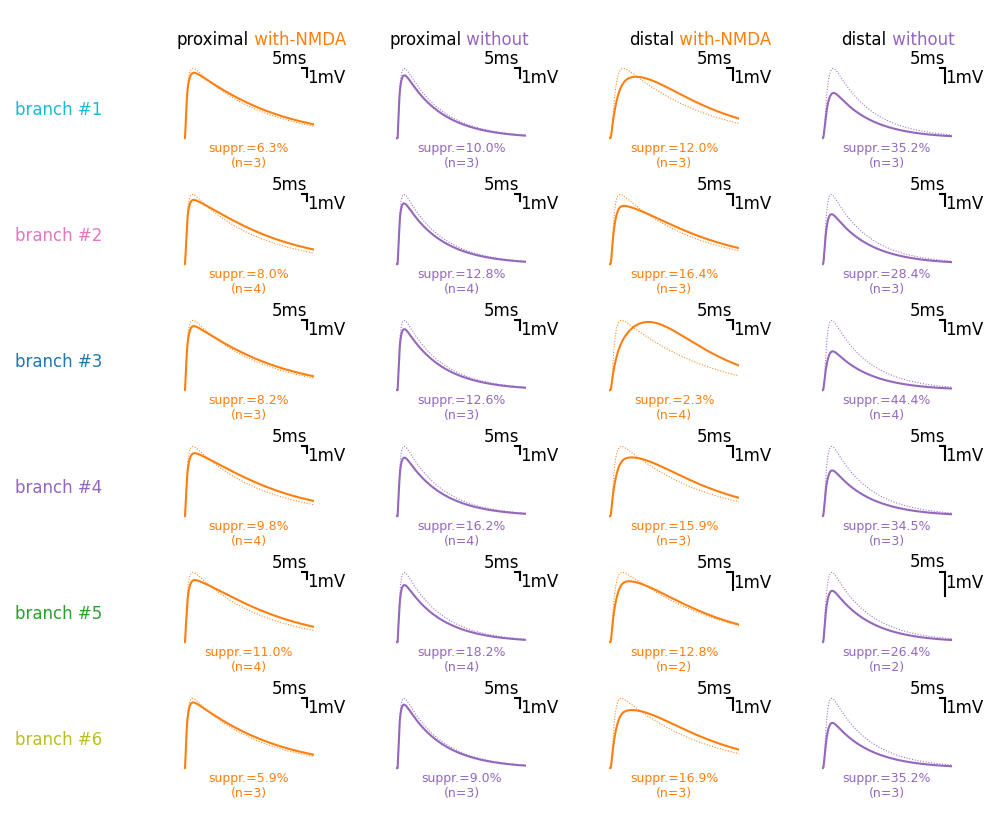

In [25]:
loc, based_on = 'soma', 'peak'
sparsening = 4.0

sim.fetch_quantity_on_grid('linear_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('real_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('%s_efficacy_%s' % (based_on, loc), dtype=float)
sim.fetch_quantity_on_grid('synapses', dtype=list)
dt = sim.fetch_quantity_on_grid('dt', return_last=True)

fig, AX = pt.figure(axes=(2*len(np.unique(sim.iDistance)),
                          len(np.unique(sim.iBranch))))
plt.subplots_adjust(top=.8)
pt.annotate(fig, 'sparsening: X%%\n\n', (0.5, .79), ha='center', xycoords='figure fraction')

CONDS = ['proximal', 'distal']
COLORS, LABELS = ['tab:orange', 'tab:purple'], [' with-NMDA', ' without']
    
for iDistance in np.unique(sim.iDistance):
    for iBranch in np.unique(sim.iBranch):
        for f, label, color in zip([0,1], LABELS, COLORS):
            params = {'iDistance':iDistance,
                      'iBranch':iBranch,
                      'synSubsamplingFraction':sparsening/100.,
                      'with_NMDA':(label==LABELS[0])}
            real = sim.get('real_%s' % loc, params)[0]
            linear = sim.get('linear_%s' % loc, params)[0]
            t = np.arange(len(real))*dt
            AX[iBranch][2*iDistance+f].plot(t, real, '-', color=COLORS[f])
            AX[iBranch][2*iDistance+f].plot(t, linear, ':', color=COLORS[f], lw=0.5)
            n = len(sim.get('synapses', params)[0])
            pt.annotate(AX[iBranch][2*iDistance+f], 
                        'suppr.=%.1f%%\n(n=%i)' % (100-sim.get('%s_efficacy_%s' % (based_on, loc),
                                                      params)[0], n),
                        (0.5,0), va='top', ha='center', color=COLORS[f], fontsize=6)
            
            pt.set_plot(AX[iBranch][2*iDistance+f], [], xlim=[0,120])
            pt.draw_bar_scales(AX[iBranch][2*iDistance+f], loc='top-right',
                               Xbar=5, Xbar_label='5ms',
                               Ybar=1 if loc=='soma' else 10,
                               Ybar_label='1mV' if loc=='soma' else '10mV')
            if iBranch==0:
                pt.annotate(AX[0][2*iDistance+f], CONDS[iDistance], (0.5,1.2), ha='right')
                pt.annotate(AX[0][2*iDistance+f], LABELS[f], (0.5,1.2), color=COLORS[f])
        #pt.set_common_ylims([AX[iBranch][2*iDistance], AX[iBranch][2*iDistance+1]])
        if iDistance==0:
            pt.annotate(AX[iBranch][iDistance], 'branch #%i' % (iBranch+1),
                        (-1.3,0.3), color=BRANCH_COLORS[iBranch])
    
fig.savefig('../figures/Figure4/cluster-single-traces-MC.pdf')
#fig.savefig('../figures/FigS9/cluster-single-traces-MC.pdf')

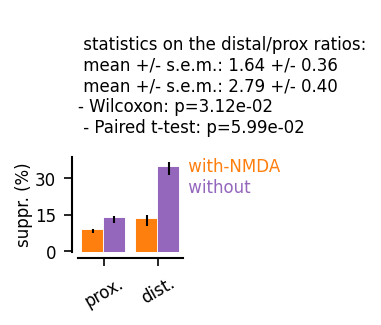

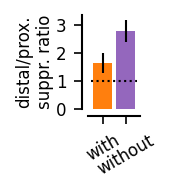

In [16]:
sparsening = 4.0
based_on = 'peak_efficacy_soma' # summary quantity to plot

fig1, ax1 = pt.figure(figsize=(.9, 1))
fig2, ax2 = pt.figure(figsize=(.63, 1))

Xs = []
for f, wNMDA in enumerate([True, False]):
    # suppression
    for iDistance in np.unique(sim.iDistance):
        params = dict(iDistance=iDistance, with_NMDA=wNMDA, synSubsamplingFraction=sparsening/100.)
        #print(100-np.mean(sim.get(based_on, params)))
        ax1.bar([iDistance+0.4*f], [100-np.mean(sim.get(based_on, params))],
                yerr=[stats.sem(sim.get(based_on, params))], color=COLORS[f], 
                lw=1, edgecolor=COLORS[f], width=0.35)
    # suppression ratios
    pProx = dict(iDistance=0, with_NMDA=wNMDA, synSubsamplingFraction=sparsening/100.)
    pDist = dict(iDistance=1, with_NMDA=wNMDA, synSubsamplingFraction=sparsening/100.)
    X = (100-sim.get(based_on, pDist))/(100-sim.get(based_on, pProx))
    ax2.bar([f], [np.mean(X)], yerr=[stats.sem(X)], color=COLORS[f])#, width=0.5)
    pt.annotate(ax1, f*'\n'+LABELS[f], (1,1), va='top', color=COLORS[f])
    Xs.append(X)
    
text = """
 statistics on the distal/prox ratios:
"""
for X in Xs:
    text += ' mean +/- s.e.m.: %.2f +/- %.2f \n' % (np.mean(X), stats.sem(X))
text += '- Wilcoxon: p=%.2e \n ' % stats.wilcoxon(*Xs).pvalue
text += '- Paired t-test: p=%.2e \n ' % stats.ttest_rel(*Xs).pvalue

pt.annotate(ax1, text, (0,1))
pt.set_plot(ax1, ylabel='suppr. (%)',
            xticks=0.2+np.arange(2),
            xticks_labels=['prox.', 'dist.'],
            xticks_rotation=30)
ax2.plot([-0.5,1.5], [1,1], 'k:')
pt.set_plot(ax2, ylabel='distal/prox.\nsuppr. ratio',
            xticks=np.arange(2), xticks_labels=['with', 'without'],
            yticks=[0,1,2,3],
            xticks_rotation=30)

fig1.savefig('../figures/Figure4/cluster-suppression-prox-dist-MC.pdf')
fig2.savefig('../figures/Figure4/cluster-suppression-ratio-MC.pdf')
#fig1.savefig('../figures/FigS9/cluster-suppression-prox-dist-MC.pdf')
#fig2.savefig('../figures/FigS9/cluster-suppression-ratio-MC.pdf')

### Boost the AMPA to reach the NMDA level (insure here that it is matched)

NMDA Test
put the `boost factor for AMPA only` variable to `1` and then run:
```
python clustered_input_stim.py -c Martinotti --nBranch 2 --sparsening 5 --suffix Test --test_NMDA
```

In [19]:
from parallel import Parallel

sim = Parallel(\
        filename='../data/detailed_model/clusterStim_simTest_Martinotti.zip')

sim.load()

Text(0.5, 1.0, 'peak increase: -0.6%')

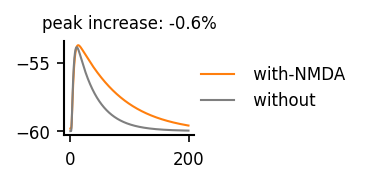

In [20]:
loc = 'soma'
sim.fetch_quantity_on_grid('linear_%s' % loc, dtype=list)
dt = sim.fetch_quantity_on_grid('dt', dtype=float, return_last=True)

COLORS, LABELS = ['tab:orange', 'tab:grey'], [' with-NMDA', ' without']

peak = {}
fig, ax = pt.figure()
for f, label, color in zip([0,1], LABELS, COLORS):
    params = {'with_NMDA':(label==LABELS[0]), 'iBranch':0}
    Vm = sim.get('linear_%s' % loc, params)[1]
    ax.plot(np.arange(len(Vm))*dt, Vm, label=label, color=color)
    peak[label] = np.max(Vm)-Vm[0]
ax.legend(loc=(1,0.2), frameon=False)
ax.set_title('peak increase: %.1f%%' % (100*(peak[' with-NMDA']-peak[' without'])/peak[' without']))

# with Stochastic Synaptic Dynamics

```
python clustered_input_stim.py --test_stochastic --p_release 0.5 --Nmax_release 1
```

In [61]:
from parallel import Parallel
from clustered_input_stim import efficacy
import numpy as np
import sys
sys.path.append('..')
import plot_tools as pt
import matplotlib.pylab as plt

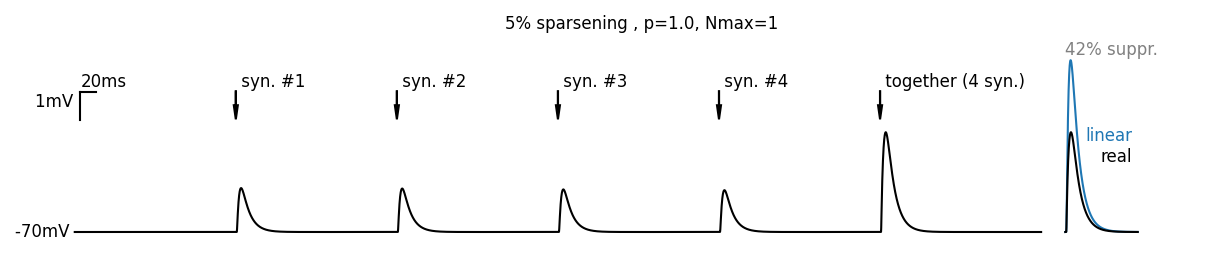

In [62]:
results = np.load('single_sim.npy', allow_pickle=True).item()

y0 = -65
t = np.arange(len(results['Vm_soma']))*results['dt']
fig, ax = pt.figure(figsize=(3,2.), left=0, bottom=0., top=0.5)

for i, syn in enumerate(results['synapses']):
    pt.arrow(ax, [results['t0']+i*results['ISI'], y0, 0, -1],
             head_width=5, head_length=0.5, width=0.2)
    pt.annotate(ax, ' syn. #%i' % (i+1), (results['t0']+i*results['ISI'], y0), xycoords='data')
pt.arrow(ax, [results['t0']+(i+1)*results['ISI'], y0, 0, -1],
         head_width=5, head_length=0.5, width=0.2)
pt.annotate(ax, ' together (%i syn.)' % len(results['synapses']), (results['t0']+(i+1)*results['ISI'], y0), xycoords='data')

ax.plot(t, results['Vm_soma'], 'k-')
pt.annotate(ax, '-70mV ', (0,-70), xycoords='data', ha='right', va='center')

ax.axis('off')
pt.draw_bar_scales(ax, Xbar=20, Xbar_label='20ms', Ybar=1, Ybar_label='1mV ')

tl = np.arange(len(results['linear_soma']))*results['dt']

for r, resp, c in zip(range(2), ['linear', 'real'], ['tab:blue', 'k']):
    ax.plot(t[-1]+30+tl[tl<90], results['%s_%s' % (resp, 'soma')][tl<90], color=c)
    pt.annotate(ax, r*'\n'+resp, (.95, 0.6), ha='right', va='top', color=c)

ax.annotate('%.0f' % (100.-results['peak_efficacy_soma']) + '% suppr.',  (t[-1]+30, .2+results['linear_soma'].max()), color='grey')
fig.suptitle('{sparsening}% sparsening , p={p_release}, Nmax={Nmax_release}'.format(**results));

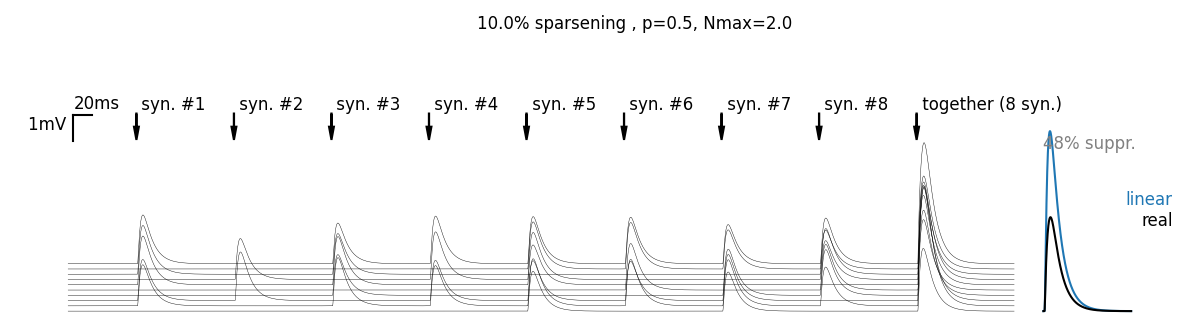

In [63]:
sim = Parallel(\
        filename='../data/detailed_model/clusterStim_simStochastic.zip')

sim.load()
sim.fetch_quantity_on_grid('real_soma', dtype=np.ndarray)
sim.fetch_quantity_on_grid('linear_soma', dtype=np.ndarray)
sim.fetch_quantity_on_grid('Vm_soma', dtype=np.ndarray)

fig, ax = pt.figure(figsize=(3,2.3), left=0, bottom=0.)

for key in ['dt', 'ISI', 't0', 'peak_efficacy_soma', 'sparsening', 'Nmax_release', 'p_release']:
    results[key] = sim.fetch_quantity_on_grid(key, return_last=True)
results['synapses'] = sim.fetch_quantity_on_grid('synapses', dtype=np.ndarray, return_last=True)
t = np.arange(len(sim.Vm_soma[0]))*results['dt']
    
y0 = -62.5

for i, syn in enumerate(results['synapses']):
    pt.arrow(ax, [results['t0']+i*results['ISI'], y0, 0, -1],
             head_width=5, head_length=0.5, width=0.2)
    pt.annotate(ax, ' syn. #%i' % (i+1), (results['t0']+i*results['ISI'], y0), xycoords='data')
pt.arrow(ax, [results['t0']+(i+1)*results['ISI'], y0, 0, -1],
         head_width=5, head_length=0.5, width=0.2)
pt.annotate(ax, ' together (%i syn.)' % len(results['synapses']), (results['t0']+(i+1)*results['ISI'], y0), xycoords='data')

for i in range(len(sim.Vm_soma)):
    ax.plot(t, sim.Vm_soma[i]+.2*i, 'k-', lw=0.2)
    
ax.axis('off')
pt.draw_bar_scales(ax, Xbar=20, Xbar_label='20ms', Ybar=1, Ybar_label='1mV ')

tl = np.arange(len(sim.linear_soma[0]))*results['dt']

for r, resp, c in zip(range(2), ['linear', 'real'], ['tab:blue', 'k']):
    ax.plot(t[-1]+30+tl[tl<90], np.array(getattr(sim, '%s_soma' % resp)).mean(axis=0)[tl<90], color=c)
    pt.annotate(ax, r*'\n'+resp, (.99, 0.6), ha='right', va='top', color=c)

Eff = efficacy(np.array(sim.real_soma).mean(axis=0), np.array(sim.linear_soma).mean(axis=0), based_on='peak')

ax.annotate('\n%.0f' % (100.-Eff) + '% suppr.', 
            (t[-1]+30, y0), color='grey', va='top')
fig.suptitle('{sparsening}% sparsening , p={p_release}, Nmax={Nmax_release}'.format(**results));

### multi-vesicular release can be better seen in the dendrite
```
python clustered_input_stim.py --test_stochastic --p_release 0.4 --Nmax_release 2 --nReleaseSeed 10 --sparsening 8 --ISI 100 --t0 20 --iDistance 0 --suffix Prox
```

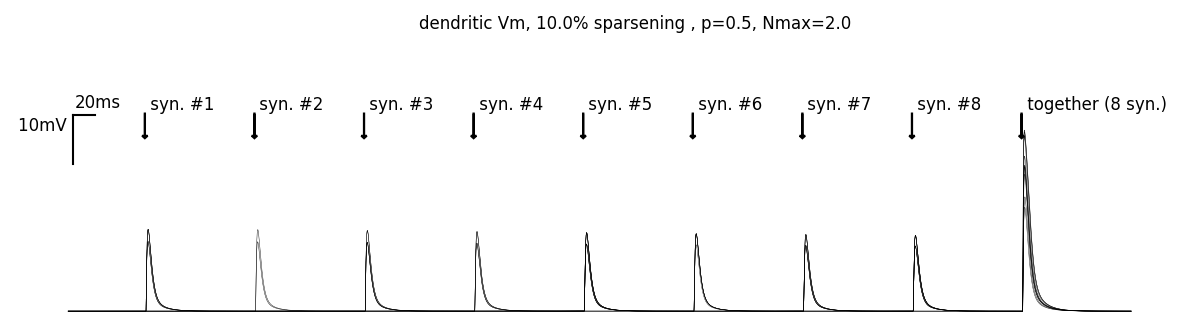

In [73]:
sim.fetch_quantity_on_grid('Vm_dend', dtype=np.ndarray)

fig, ax = pt.figure(figsize=(3,2.3), left=0, bottom=0.)

for key in ['dt', 'ISI', 't0', 'peak_efficacy_soma', 'sparsening', 'Nmax_release', 'p_release']:
    results[key] = sim.fetch_quantity_on_grid(key, return_last=True)
results['synapses'] = sim.fetch_quantity_on_grid('synapses', dtype=np.ndarray, return_last=True)
t = np.arange(len(sim.Vm_soma[0]))*results['dt']
    
y0 = -30

for i, syn in enumerate(results['synapses']):
    pt.arrow(ax, [results['t0']+i*results['ISI'], y0, 0, -5],
             head_width=5, head_length=0.5, width=0.2)
    pt.annotate(ax, ' syn. #%i' % (i+1), (results['t0']+i*results['ISI'], y0), xycoords='data')
pt.arrow(ax, [results['t0']+(i+1)*results['ISI'], y0, 0, -5],
         head_width=5, head_length=0.5, width=0.2)
pt.annotate(ax, ' together (%i syn.)' % len(results['synapses']), (results['t0']+(i+1)*results['ISI'], y0), xycoords='data')

for i in range(len(sim.Vm_soma)):
    ax.plot(t, sim.Vm_dend[i]+0*i, 'k-', lw=0.2)
    
ax.axis('off')
pt.draw_bar_scales(ax, Xbar=20, Xbar_label='20ms', Ybar=10, Ybar_label='10mV ')

fig.suptitle('dendritic Vm, {sparsening}% sparsening , p={p_release}, Nmax={Nmax_release}'.format(**results));

[]
[]
[]
[]

 statistics on the distal/prox ratios:

 mean +/- s.e.m.: nan +/- nan
 mean +/- s.e.m.: nan +/- nan
- Wilcoxon:        WilcoxonResult(statistic=nan, pvalue=nan)
- Paired t-test:   TtestResult(statistic=nan, pvalue=nan, df=nan)


/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


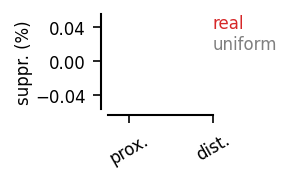

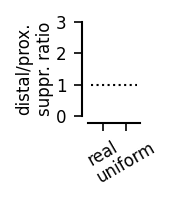

In [91]:
sim = Parallel(\
        filename='../data/detailed_model/clusterStim_simStochastic_Basket.zip')
sim.load()

import numpy as np
from scipy import stats

loc, based_on = 'soma', 'peak'
sparsening = 4.0

COLORS, LABELS = ['tab:red', 'tab:grey'], ['real', 'uniform']

sim.fetch_quantity_on_grid('linear_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('real_%s' % loc, dtype=list)
sim.fetch_quantity_on_grid('%s_efficacy_%s' % (based_on, loc), dtype=float)
sim.fetch_quantity_on_grid('synapses', dtype=list)
dt = sim.fetch_quantity_on_grid('dt', return_last=True)

sparsening = 4.0

fig1, ax1 = pt.figure(figsize=(.9, 1))
fig2, ax2 = pt.figure(figsize=(.63, 1))

Xs = []
for f, fU in enumerate([False, True]):
    # suppression
    for iDistance in np.unique(sim.iDistance):
        params = dict(iDistance=iDistance, from_uniform=fU, sparsening=sparsening)
        print(sim.get('%s_efficacy_%s' % (based_on, loc), params))
        ax1.bar([iDistance+0.4*f], [100-np.mean(sim.get('%s_efficacy_%s' % (based_on, loc), params))],
               yerr=[stats.sem(sim.get('%s_efficacy_%s' % (based_on, loc), params))], color=COLORS[f], width=0.35)
    # suppression ratios
    pProx = dict(iDistance=0, from_uniform=fU, sparsening=sparsening)
    pDist = dict(iDistance=1, from_uniform=fU, sparsening=sparsening)
    X = (100-sim.get('%s_efficacy_%s' % (based_on, loc), pDist))/(100-sim.get('%s_efficacy_%s' % (based_on, loc), pProx))
    ax2.bar([f], [np.mean(X)], yerr=[stats.sem(X)], color=COLORS[f])#, width=0.5)
    pt.annotate(ax1, f*'\n'+LABELS[f], (1,1), va='top', color=COLORS[f])
    Xs.append(X)
    
print('\n statistics on the distal/prox ratios:\n')
for X in Xs:
    print(' mean +/- s.e.m.: %.2f +/- %.2f' % (np.mean(X), stats.sem(X)))
print('- Wilcoxon:       ', stats.wilcoxon(*Xs))
print('- Paired t-test:  ', stats.ttest_rel(*Xs))

pt.set_plot(ax1, ylabel='suppr. (%)',
            xticks=0.2+np.arange(2), xticks_labels=['prox.', 'dist.'],
            xticks_rotation=30)

ax2.plot([-0.5,1.5], [1,1], 'k:')
pt.set_plot(ax2, ylabel='distal/prox.\nsuppr. ratio',
            xticks=np.arange(2), xticks_labels=['real', 'uniform'],
            yticks=[0,1,2,3],  
            #ylim=[0,4],
            xticks_rotation=30)

#fig1.savefig('../figures/Figure4/cluster-suppression-prox-dist-BC.pdf')
#fig2.savefig('../figures/Figure4/cluster-suppression-ratio-BC.pdf')